In [23]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

RANDOM = 42



In [24]:
iris = load_iris()
x = iris.data                                   # Features like sepal/petal length/width
y = iris.target                                 # Target variable: 0,1,2 for species of flowers
feature_names = iris.feature_names              # Names of the features (column names)
target_names = iris.target_names                # Names of the target classes (species)

df = pd.DataFrame(x, columns=feature_names)     # Wraps x into a nice table
df['target'] = y                                # Adds the target variable to the DataFrame
df.head()                                       # prints first 5 rows to see what data looks like.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
# Splits the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM, stratify=y)

In [50]:
# make pipeline to train and test classifier
classifier = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=RANDOM))

classifier.fit(x_train, y_train)                # trains the model
predictions = classifier.predict(x_test)        # makes predictions on the test set

accuracy = accuracy_score(y_test, predictions)  # calculates accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')       # prints accuracy

Accuracy: 93.33%


c:\Users\puspa\OneDrive - Drexel University\Puspa\Career-Processes\AI-ML Engineering\Repos\AI-ML-Practice-Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



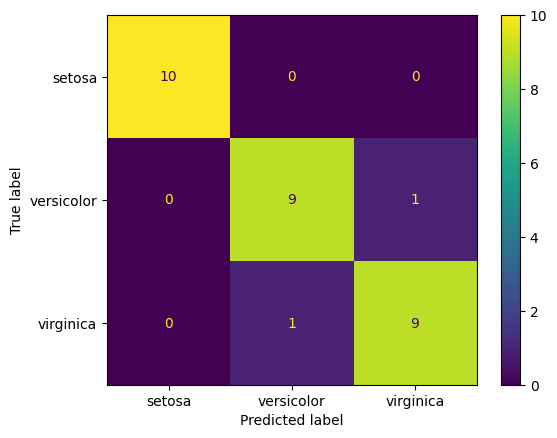

In [69]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Print classification report (details)
print(classification_report(y_test, predictions, target_names=target_names))

# Plot confusion matrix (graph)
display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=target_names)